In [156]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import math

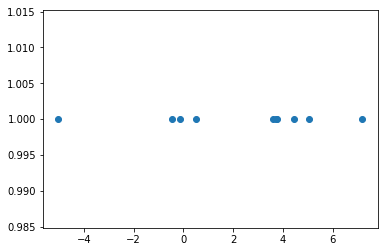

In [1005]:
# generate 10 points from N(2, 3)
mu_actual, sigma_actual = 1, 3
n = 10
x = np.random.normal(mu_actual, sigma_actual, n)
y = np.linspace(1, 1, n)
plt.scatter(x, y)

# mu_actual, sigma_actual = 2, 2
# n = 10
# x = np.linspace(1, n, n)
# y = x*mu_actual + np.random.normal(0, sigma_actual, n)
# plt.scatter(x, y)

In [1006]:
def delta():
    return 2*(np.random.uniform() - 0.5)

def delta_sig():
    return delta()*0.01

def delta_mu():
    return delta()*0.01
    
def posterier(mu, sigma):
    likelihoods = stats.norm.pdf(x, mu, sigma)
    priors = 10 #10*stats.halfnorm.pdf(sigma, sigma_actual*3)
    return np.prod(likelihoods*priors)

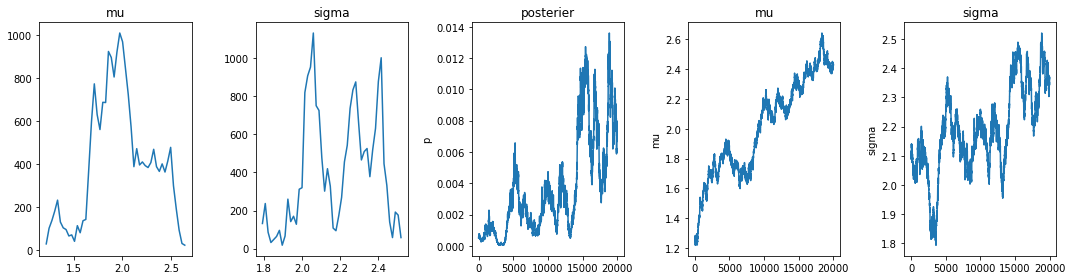

In [1011]:
runs = 20000
p = np.ndarray((runs,3))
sigma, old_sigma = 1, 1
mu, old_mu = 1, 1
gibbs_sigma = True
p_last = posterier(mu, sigma)
warm_ups = 20000
p[0] = [0, mu, sigma]
for i in range(1,runs+warm_ups):
    # generate sigma, mu alternating (gibbs)
    if gibbs_sigma: 
        mu = old_mu+ delta_mu()
    else:
        sigma = max(old_sigma+delta_sig(), 0)
    gibbs_sigma = not gibbs_sigma
    # now calc posterier sample
    p_new = posterier(mu, sigma)
#     print mu, sigma, p_new
    if p_new > p_last or np.random.uniform() < p_new/p_last:
        p_last = p_new
        old_mu, old_sigma = mu, sigma
        if (i >= warm_ups):
            p[i-warm_ups] = [p_last, mu, sigma]
    elif i >= warm_ups and i > 1:
        p[i-warm_ups] = p[i-warm_ups-1]
              
hist, edges = np.histogramdd(p[:,1:], bins = (50, 50))
x_axis = np.linspace(1, runs, runs)
plt.figure(figsize=(15,4))
plt.subplot(1, 5, 1)
plt.title('mu')
plt.plot(np.linspace(edges[0][0], edges[0][50], 50), np.sum(hist, axis=0)) 
plt.subplot(1, 5, 2)
plt.title('sigma')
plt.plot(np.linspace(edges[1][0], edges[1][50], 50), np.sum(hist, axis=1)) 
plt.subplot(1, 5, 3)
plt.title('posterier')
plt.plot(x_axis, p[:, 0])
plt.ylabel('p')
plt.subplot(1, 5, 4)
plt.title('mu')
plt.plot(x_axis, p[:, 1])
plt.ylabel('mu')
plt.subplot(1, 5, 5)
plt.title('sigma')
plt.plot(x_axis, p[:, 2])
plt.ylabel('sigma')
plt.tight_layout()
plt.show()

In [731]:
p_new, p_last = .1, 1
total = 0
N = 1000
for i in range(0,N):
    if p_new > p_last or np.random.uniform() < p_new/p_last:
        total += 1
total/float(N)

0.097